# Assignment 2. Statistical Methods in Data Science

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For your questions refer to asoleix@gmail.com or @amirsoleix on Telegram*

### Description  
In this homework you will again work with real-world data. <a href="https://en.wikipedia.org/wiki/Upworthy"> **Upworthy**</a> is a news website dedicated to creating viral and positive content. During the lectures, you have seen (or soon will see) how maximizing user engagement and click-rate is of great importance and a main objective for such businesses.  

### Information  
Complete the information box below.

In [66]:
full_name = 'Mahdi Hajialilue'
student_id = '99100358'

Using the data from <a href="https://doi.org/10.1038/s41597-021-00934-7">this paper</a> (provided in `data` folder), you are supposed to:
- Use more advanced practices in Numpy, Pandas, Matplotlib frequently used in data science projects
- Perform simple statistical analysis on real-world data
- Go one step further and generalize your findings
- Suggest insightful directions for improving the website's performance  



### Notes  
In the sections marked with **Discuss**, no coding is required. Just present your whole logic and the steps you took thinking and coming up with the result. You can provide your explanation either in **English** or **Persian**. There is no obligation to use any specific language.

### Understanding the Problem
As stated above, Upworthy is, in essence, a content creation and news delivery business. The process of creating a news-related post starts from the raw material and then proceeds to processing the information and presenting it in a way that engages the users, i.e. having them interact with the website, as much as possible.  

We have discussed main objectives and income sources of various businesses and how data science can affect that. You must know that the main source of revenue and consequently the most important goal of Upworthy, is to get the most views and clicks per piece of news.  

A typical form of presentation for news websites is to first show the user a headline together with a thumbnail and sometimes an excerpt (or **lede** as defined later). But it is a well-known fact that not all the headlines attract users the same.  

There are always several possible headlines that can be used for a piece of news. Nonetheless, just one can be used for presenting each content and we know that there is no scientific or formulaic approach to predict which one will actually be the most interesting for the users.  

**Here is where you data scientists are brought into field!**  
The problem is simply to find which headline should be chosen for any individual post to maximize the website's profit. What solutions come to your mind? Can you think of a novel formula to mathematically calculate an indicator of the headlines attractiveness? What about its engaging rate?


### Discuss
What possible solutions can you think of for this problem? Can you solve it mathematically? If so explain your solution, and if not, explain why do you think it's not feasible?

We adopt an A/B testing methodology where users are randomly assigned different headlines, and their engagement and time spent on the website are monitored. This approach bears resemblance to the $\epsilon$-greedy strategy employed in multi-armed bandit scenarios within Reinforcement Learning, where $\epsilon$ assumes values like 0.1 or 0.01. The headline generating higher engagement yields greater rewards, shifting the probability for a random user to view that headline towards certainty (1-$\epsilon$), while other headlines reduce to a probability of $\epsilon$. Consequently, if an alternative headline outperforms the current champion, it supersedes as the primary headline.

### Continuing with data science...

As you have learnt during the past lectures, the first step to understand the problem, as carried out by the scientists hired by Upworthy, is to collect as much data as available. Then they have performed simple statistical analysis to understand wether one headline is significantly impacting the users' interaction with the website.

Throughout this homework, we will analyze data from A/B tests of headlines conducted by Upworthy from January 2013 to April 2015 to study whether the language used in the headline determines the number of people that will read the associated news piece.  
The homework contains four tasks:  
1. Processing the data  
2. Extracting meaningful signals from the data
3. Testing whether the language of headlines impacts their success  
4. Exploring the heterogeneity of this effects (e.g., does it vary through time?).


### **What is an A/B test?** 
A/B tests are experiments that compare two scenarios (e.g., scenario A vs. scenario B). 
They test subjects' responses to each of the variants to determine which is more effective ([read more about A/B tests on Wikipedia](https://en.wikipedia.org/wiki/A/B_testing)).  
A/B tests allow us to draw conclusions about the different scenarios by randomizing exposure to them, e.g., one could flip a coin and assign a user to scenario A if it lands heads and to B if it lands tails.  
Since exposure is randomized, we can be confident that the scenarios are the sole explanation for statistically significant differences in subjects' responses (if they exist).  
In theory, A/B testing refers to an experiment that compares two scenarios; however, in practice, the term is also used when we compare multiple scenarios (e.g., A vs. B vs. C), although the more precise terminology would be to call such an experiment a "multinomial test."

### **How were A/B tests used by Upworthy?** 
Upworthy used A/B testing to increase news readership, conducting experiments for each published news piece.  
In each experiment, they created multiple "packages" of stimuli, varying headlines, images, excerpts, and **ledes** for the same news piece.  
Different "packages" were shown on their (now defunct) website to engage users with the news pieces they produced. Upworthy found "the best" package by conducting A/B tests, showing different packages to different users, and measuring how often users clicked on each version.  
Below, we show three "packages" used by Upworthy in an experiment, each with a different headline for the same news piece.  
Upworthy randomized users that visited their website saw one of the three versions of the headline below. Then, they measured the percentage of times users in each scenario clicked to read the news.  
The headline with the highest percentage of clicks per view (click through rate) was then declared the "winner" and became the default for all visitors.

![Example A/B test](example.png)

### **Terminology**

- **News piece:** A news article. In the dataset considered, these were all produced by Upworthy.
- **Package:** The set of visual stimuli inviting the user to read an article. The figure above shows a package with a headline and an image. At times, there was an excerpt of the article also shown in the package and/or the **lede**, i.e., ["the introductory section of a news story that is intended to entice the reader to read the full story."](https://www.merriam-webster.com/words-at-play/bury-the-lede-versus-lead#:~:text=In%20journalism%2C%20the%20lede%20refers,machines%20began%20disappearing%20from%20newsrooms.)
- **Experiment:** Each experiment is an A/B test (or multinomial test, to be more precise) comparing how users reacted to different "packages." Experiments measured two things: 
  1. how many users were shown each package.
  2. how many individuals clicked each package.


### **Data description**

| Column name          | Description                                                                                                                                    
|----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| created_at           | Time the package was created (timezone unknown)|
| test_week            | Week the package was created, a variable constructed by the archive creators for stratified random sampling|
| clickability_test_id | The test ID. Viewers were randomly assigned to packages with the same test ID|
| impressions          | The number of viewers who were assigned to this package. The total number of participants for a given test is the sum of impressions for all packages that share the same clickability_test_id|
| headline             | The headline being tested|
| eyecatcher_id        | Image ID. Image files are not available. Packages that shared the same image have the same eyecatcher_id|
| clicks               | The number of viewers (impressions) that clicked on the package. The clickrate for a given package is the number of clicks divided by the number of impressions|
| excerpt              | Article excerpt|
| lede                 | The opening sentence or paragraph of the story|
| slug                 | Internal name for the web address|
| share_text           | Summary for display on social media when the article is shared. This was not shown in tests, since tests were conducted on the Upworthy website|
| square               | When used, part of the same social media sharing suggestion as the share text|
| significance         | NOT an estimate of statistical significance; a complex, inconsistent calculation that compared the clicks on a package to the clicks on all previous packages that were fielded on the same pages|
| first_place          | Along with significance, shown to editors to guide decisions about what test to choose|
| winner               | Whether a package was selected by editors to be used on the Upworthy site after the test|
| updated_at           | The last time the package was updated in the Upworthy system|


## 1 Getting Familiar with the Data

Your first task is to conduct initial analyses to understand the data and process it in a way that will allow us to more easily answer our key question: *how does the language of a headline determine its success?*

1.1 Load the data into memory using pandas and print the first lines to get a sense of it.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/upworthy.csv')
df.head()

,created_at,updated_at,clickability_test_id,excerpt,headline,lede,slug,eyecatcher_id,impressions,clicks,significance,first_place,winner,share_text,square,test_week
0,2014-11-20 06:43:16.005,2016-04-02 16:33:38.062,546d88fb84ad38b2ce000024,Things that matter. Pass 'em on.,They're Being Called 'Walmart's Worst Nightmar...,"<p>When I saw *why* people are calling them ""W...",theyre-being-called-walmarts-worst-nightmare-a...,546d6fa19ad54eec8d00002d,3052,150,100.0,True,True,Anyone who's ever felt guilty about shopping a...,NaN,201446
1,2014-11-20 06:54:36.335,2016-04-02 16:25:54.027,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546bc55335992b86c8000043,3526,90,4.1,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
2,2014-11-20 06:54:57.878,2016-04-02 16:31:45.671,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714cd2dd00002e,3506,120,100.0,True,False,"If you ever wondered, ""but what about the men?...",NaN,201446
3,2014-11-20 06:55:07.212,2016-04-02 16:25:54.029,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c6c44000038,3380,98,25.3,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446
4,2014-11-20 06:55:20.347,2016-04-02 16:25:54.032,546d902c26714c6c44000039,Things that matter. Pass 'em on.,This Is What Sexism Against Men Sounds Like,<p>DISCLOSURE: I'm a dude. I have cried on mul...,this-is-what-sexism-against-men-sounds-like-am...,546d900426714c1ad900001e,3465,75,0.2,False,False,"If you ever wondered, ""but what about the men?...",NaN,201446


1.2 Each experiment comparing different versions of the same news piece ("packages") has a unique identifier (`clickability_test_id` column). 
Calculate how many different experiments were conducted in this dataset and, on average, how many packages were considered per experiment.  
Last, plot the distribution of packages per experiment with a visualization of your choice.

Number of different experiments: 4822
Packages per experiment: 4.2727084197428455


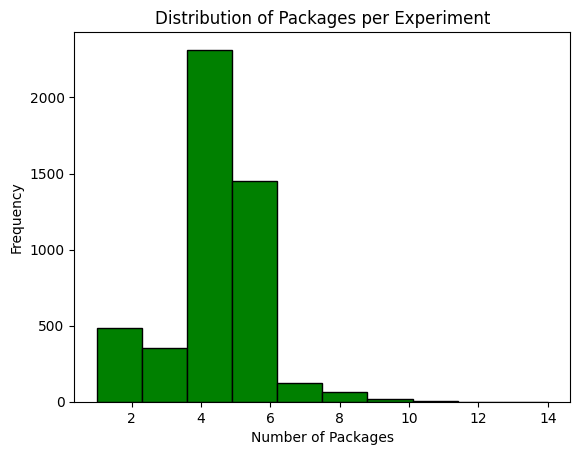

In [17]:
num_experiments = df['clickability_test_id'].nunique()
print('Number of different experiments:', num_experiments)

packages_per_experiment = len(df) / num_experiments
print('Packages per experiment:', packages_per_experiment)

packages_counts = df.groupby('clickability_test_id').size()
plt.hist(packages_counts, bins=10, color='green', edgecolor='black')
plt.xlabel('Number of Packages')
plt.ylabel('Frequency')
plt.title('Distribution of Packages per Experiment')
plt.show()

1.3 A common way to measure success in online A/B tests is what is called "the clickthrough rate."
Given that often A/B tests are created to find what engages users (here, "packages" of headlines, images, etc), we would expect that a "good" package makes people click often.  
Create a column named `ctr` by dividing the number of clicks a package received (`clicks` column) by the number of impressions it received (`impressions` column).

In [18]:
df['ctr'] = df['clicks']/df['impressions']

1.4 Packages varied any combination of the headline (`headline` column), the excerpt (`excerpt`), the first sentence of the article (`lede`), and the image that illustrates the news piece (`eyecatcher_id`, a hash per image).  
But we want to isolate the effect of the headline on the clickthrough rate. To do that, create a new dataframe where you filter all experiments where only one headline is present.  
Print the length of this new dataframe and how many experiments were discarded in the filtering process.

In [19]:

initial_package_count = len(df['clickability_test_id'].unique())


no_variation_packages = df.groupby('clickability_test_id').filter(lambda x: x['headline'].nunique() == 1)

new_df_headline = df[~df['clickability_test_id'].isin(no_variation_packages['clickability_test_id'])]


remaining_package_count = len(new_df_headline['clickability_test_id'].unique())

print("Initial number of tests:", initial_package_count)
print("Number of discarded removed:", initial_package_count - remaining_package_count)
print("Number of tests after filtering:", remaining_package_count)

Initial number of tests: 4822
Number of discarded removed: 2236
Number of tests after filtering: 2586


1.5 For comparison, repeat the procedure described in **T1.4** with the `eyecatcher_id` column, i.e., create a dataframe considering only experiments that vary the image. Again, print the length of this new dataframe and how many experiments were discarded in the filtering process.


In [20]:
initial_package_count = len(df['clickability_test_id'].unique())


no_variation_packages = df.groupby('clickability_test_id').filter(lambda x: x['eyecatcher_id'].nunique() == 1)


new_df_image = df[~df['clickability_test_id'].isin(no_variation_packages['clickability_test_id'])]


remaining_package_count = len(new_df_image['clickability_test_id'].unique())



print("Initial number of tests:", initial_package_count)
print("Number of discarded removed:", initial_package_count - remaining_package_count)
print("Number of tests after filtering:", remaining_package_count)

Initial number of tests: 4822
Number of discarded removed: 3103
Number of tests after filtering: 1719


1.6 Considering the answers to questions **T1.4** and **T1.5**, what can we say about the different versions of the news tested by Upworthy?

Upworthy has conducted a greater number of experiments analyzing the impact of headlines on click rates compared to the number of tests focused on evaluating the influence of thumbnails or images on click rates.

1.7 For our subsequent analysis, we want to compare the causal effect of headlines on the success of a news piece. 
For that, we can compare pairs of packages with the same `eyecatcher_id`, `lede`, and `excerpt`, but different `headlines`.
Note that this means that if an experiment considered 5 different headlines and did not vary any other stimulus, we would have 5C2 (i.e., 5 choose 2, 10) pairs to consider.
Create a dataset where:
- Each row corresponds to a pair of packages with different `headline` but the same `eyecatcher_id`, `lede`, and `excerpt`. 
- There are columns containing the headlines of each of the news versions (`headline1`, `headline2`) and the clickthrough rate of each of the news versions (`ctr1`, `ctr2`). 
- The columns `headline1` and `ctr1` contain the data associated with the news version with the highest clickthrough rate. Print the first rows of your newly created dataframe, as well as its length.
-  The rows where the two news pieces had exactly the same clickthrough rate should be filtered out (this is for simplicity's sake).
-  The column `date_created` contains the date when the news version with the highest clickthrough rate was created.


In [21]:
from itertools import combinations

# Assuming df is your DataFrame

# Grouping the data by unique combinations of 'eyecatcher_id', 'lede', 'excerpt', and 'clickability_test_id'
grouped = new_df_headline.groupby(['eyecatcher_id', 'lede', 'excerpt', 'clickability_test_id'])

pairs = []
for name, group in grouped:
    combinations_list = list(combinations(group.index, 2))
    for pair_idx1, pair_idx2 in combinations_list:
        row1 = group.loc[pair_idx1]
        row2 = group.loc[pair_idx2]
        
        if row1['headline'] != row2['headline']:
            similiar_values = {
                'eyecatcher_id': row1['eyecatcher_id'],
                'lede': row1['lede'],
                'excerpt': row1['excerpt'],
                'clickability_test_id': row1['clickability_test_id']
            }
            
            different_values = {
                'ctr1': row1['ctr'] if row1['ctr'] >= row2['ctr'] else row2['ctr'],
                'ctr2': row2['ctr'] if row1['ctr'] >= row2['ctr'] else row1['ctr'],
                'headline1': row1['headline'] if row1['ctr'] >= row2['ctr'] else row2['headline'],
                'headline2': row2['headline'] if row1['ctr'] >= row2['ctr'] else row1['headline'],
                'date_created': row1['created_at'] if row1['ctr'] >= row2['ctr'] else row2['created_at']

            }
        
            pairs.append({**similiar_values, **different_values})

new_df_pair = pd.DataFrame(pairs)

In [22]:
new_df_pair.head()

,eyecatcher_id,lede,excerpt,clickability_test_id,ctr1,ctr2,headline1,headline2,date_created
0,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.023810,0.010676,I Never Would Have Noticed This Crazy Gender I...,Numbers We Need To Know About The Names We See...,2014-03-12 22:10:26.299
1,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.020756,0.010676,A Group Of Women Had A Hypothesis About Sexism...,Numbers We Need To Know About The Names We See...,2014-03-12 22:05:12.68
2,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.021956,0.010676,The Unconscious Biases Of Even Extremely Educa...,Numbers We Need To Know About The Names We See...,2014-03-12 22:02:20.69
3,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.014019,0.010676,Feel Like It's Still A Man's World? It's Not A...,Numbers We Need To Know About The Names We See...,2014-03-12 21:59:41.066
4,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.012302,0.010676,Care To Guess Which Sacred Publications Have L...,Numbers We Need To Know About The Names We See...,2014-03-12 17:21:32.477


1.8 To get a sense of the impact of headline change, measure the average difference per pair between the most clicked-through (`ctr1`) and the least clicked-through headline (`ctr2`), as well as the average clickthrough rate for the least clicked through headline (`ctr2`).

In [23]:
average_difference_per_pair = new_df_pair['ctr1'].sub(new_df_pair['ctr2']).mean()

average_least_clicked_rate = new_df_pair['ctr2'].mean()

print('average pair difference: ', average_difference_per_pair)
print('average loser rate: ', average_least_clicked_rate)
print('ratio: ', (average_difference_per_pair + average_least_clicked_rate)/average_least_clicked_rate)

average pair difference:  0.004131043605885015
average loser rate:  0.011019134928740962
ratio:  1.3748972703029625


 1.9 **Discuss:** Considering your answer to **T1.8**, and assuming the average differences in clickthrough rates between pairs are statistically significant, do you think that headlines are impactful in the news business? Justify with the data.

Evidently, the winner headlines on average have more clickthrough rate than loser headline which is substantial given the sample size. So it is clear that headline is an important feature in a news piece that needs much attention to help make a piece have a high clickthrough rate.

## 2 Extracting Signals from the Data

Your second task is to extract meaningful signals from the data.  
We start this task from the dataset obtained in **T1.7**.   
Recall that we have one A/B test per row with the clickthrough rate of two news pieces that differ only in their headline.  
We refer to the version with the higher clickthrough rate as the "winner" and the version with the lower as the "loser."  
(Note that this is not the same as the column `winner` in the original data, which captures a similar concept but considering the original experiments, where multiple comparisons were made!)  
 
2.1 Using the function provided below, count the number of words in each headline, creating columns `numwords1` and `numwords2` corresponding to the number of words in the winner and loser headlines.

In [24]:
new_df_pair['numwords1'] = new_df_pair['headline1'].apply(count_words_simple)
new_df_pair['numwords2'] = new_df_pair['headline2'].apply(count_words_simple)


2.2 Using the dictionary of pronouns provided below, create indicator variables corresponding to each set of pronouns (e.g., first-person singular may yield columns `first_person_singular1` and `first_person_singular2` for the headlines in each A/B test). 
Each indicator variable in the dataframe should equal 1 if the corresponding headline uses the corresponding type of pronoun and 0 otherwise. 
Your code should be agnostic to lower/upper case.

In [25]:

for feature, pronouns in feature_wordsets.items():
    for i in range(1, 3): 
        column_name = f"{feature}{i}_indicator"
        new_df_pair[column_name] = new_df_pair[f'headline{i}'].apply(lambda x: any(word.lower() in x.lower() for word in pronouns)).astype(int)


new_df_pair.head(2)


,eyecatcher_id,lede,excerpt,clickability_test_id,ctr1,ctr2,headline1,headline2,date_created,numwords1,...,first_person_singular1_indicator,first_person_singular2_indicator,first_person_plural1_indicator,first_person_plural2_indicator,second_person1_indicator,second_person2_indicator,third_person_singular1_indicator,third_person_singular2_indicator,third_person_plural1_indicator,third_person_plural2_indicator
0,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.023810,0.010676,I Never Would Have Noticed This Crazy Gender I...,Numbers We Need To Know About The Names We See...,2014-03-12 22:10:26.299,16,...,1,1,1,1,0,0,1,1,0,0
1,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.020756,0.010676,A Group Of Women Had A Hypothesis About Sexism...,Numbers We Need To Know About The Names We See...,2014-03-12 22:05:12.68,19,...,1,1,0,1,0,0,1,1,1,0


2.3 One easy way to classify sentiment is simply to match negative or positive words. 
    Use the lists of words (positive and negative files in `data` folder) to obtain "positive sentiment" and "negative sentiment" scores for each headline. Create columns `positive1`/`positive2` and `negative1`/`negative2` containing indicator variables for positive and negative sentiment, i.e., A headline has a "positive sentiment" (or negative) score equal 1 if it contains at least one positive (or negative) sentiment word on the list. Otherwise, its "positive sentiment" (or negative) score equals 0.
    
[1]: https://ptrckprry.com/course/ssd/data/positive-words.txt
[2]: https://ptrckprry.com/course/ssd/data/negative-words.txt

--- 

**Comments**

- For **T2.3**, beware of encodings!

In [26]:
with open('data/negative-words.txt', 'r') as file:
    words = file.read().splitlines()

negative_words = pd.DataFrame(words, columns=['negative_words'])

with open('data/positive-words.txt', 'r') as file:
    words = file.read().splitlines()

positive_words = pd.DataFrame(words, columns=['positive_words'])

for i in range(1, 3):  
    column_name_positive = f"positive{i}"
    column_name_negative = f"negative{i}"
    
    new_df_pair[column_name_positive] = new_df_pair[f'headline{i}'].apply(
        lambda x: any(word.lower() in x.lower() for word in positive_words['positive_words'])
    ).astype(int)
    
    new_df_pair[column_name_negative] = new_df_pair[f'headline{i}'].apply(
        lambda x: any(word.lower() in x.lower() for word in negative_words['negative_words'])
    ).astype(int)




In [27]:
new_df_pair.head(3)

,eyecatcher_id,lede,excerpt,clickability_test_id,ctr1,ctr2,headline1,headline2,date_created,numwords1,...,second_person1_indicator,second_person2_indicator,third_person_singular1_indicator,third_person_singular2_indicator,third_person_plural1_indicator,third_person_plural2_indicator,positive1,negative1,positive2,negative2
0,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.023810,0.010676,I Never Would Have Noticed This Crazy Gender I...,Numbers We Need To Know About The Names We See...,2014-03-12 22:10:26.299,16,...,0,0,1,1,0,0,0,1,0,1
1,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.020756,0.010676,A Group Of Women Had A Hypothesis About Sexism...,Numbers We Need To Know About The Names We See...,2014-03-12 22:05:12.68,19,...,0,0,1,1,1,0,0,1,0,1
2,5332b4f11fae79f09f0000a8,"<p>Somewhere in between the vast, evil conspir...",Things that matter. Pass 'em on.,532088a8c532cfc755000042,0.021956,0.010676,The Unconscious Biases Of Even Extremely Educa...,Numbers We Need To Know About The Names We See...,2014-03-12 22:02:20.69,9,...,0,0,1,1,0,0,1,1,0,1


In [28]:
# 2.1 (provided code)
def count_words_simple(x):
    return len(x.split(" "))


In [29]:
# 2.2 (provided code)
feature_wordsets = dict([
    # https://en.wikipedia.org/wiki/English_personal_pronouns
    ('first_person_singular', ['i', 'me', 'my', 'mine', 'myself',
                               "i'd", "i'll", "i'm", "i've", 'id', 'im', 'ive']),
    ('first_person_plural', ['we', 'us', 'our', 'ours', 'ourselves',
                              "we'd", "we'll", "we're", "we've",]),
    ('second_person', ['you','your','yours','yourself',
                              "ya", "you'd", "you'll", "you're", "you've", 'youll', 'youre', 'youve', 
                              'yourselves']),
    ('third_person_singular', ['he','him','his','himself',
                               "he'd", "he's", 'hes',
                               'she','her','hers','herself', 
                               "she'll", "she's", 'shes',
                               'it','its','itself',
                               'themself']),
    ('third_person_plural', ['they','them','their','theirs','themselves',
                              "they'd", "they'll", "they've", 'theyll', 'theyve'])
])

## 3 Estimating the Effect of Language on Headline Success

Your third task revolves around the question *how does language impact headlines' success?*

3.1 First, we examine whether the winner headlines have more or fewer words than the loser headline. Conduct an independent sample t-test and paired t-test (see [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind); for the independent sample t-test, assume equal variance). Also, calculate and print the mean difference between the number of words in the winner and the loser headlines.

In [30]:
from scipy import stats


independent_ttest = stats.ttest_ind(new_df_pair['numwords1'], new_df_pair['numwords2'], equal_var=True)
print("Independent Sample T-test:")
print("T-statistic:", independent_ttest.statistic)
print("P-value:", independent_ttest.pvalue)

print()

paired_ttest = stats.ttest_rel(new_df_pair['numwords1'], new_df_pair['numwords2'])
print("Paired T-test:")
print("T-statistic:", paired_ttest.statistic)
print("P-value:", paired_ttest.pvalue)

print()

mean_difference = (new_df_pair['numwords1'] - new_df_pair['numwords2']).mean()
print("Mean Difference between the number of words in winner and loser headlines:", mean_difference)



Independent Sample T-test:
T-statistic: 7.940739434290007
P-value: 2.076538765779947e-15

Paired T-test:
T-statistic: 9.593643777472106
P-value: 9.75635977792992e-22

Mean Difference between the number of words in winner and loser headlines: 0.2749489535477284


3.2 **Discuss:** Are longer headlines more successful? Justify.

The P-values calculated are significantly small so the null hypothesis (headline length has no effect on clickthrough rate) is rejected completely. Also the mean difference of words in winner and loser headlines is positive so the longer headlines have more chance of succeeding.
  

3.3 The [t-statistic](https://en.wikipedia.org/wiki/T-statistic) is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. In a t-test, the higher the t-statistic, the more confidently we can reject the null hypothesis. Use `numpy.random` to create four samples, each of size 30:
- $X \sim Uniform(0,1)$
- $Y \sim Uniform(0,1)$
- $Z = X/2 + Y/2 + 0.1$
- $K = Y + 0.1$

In [93]:
X = np.random.uniform(0, 1, 30)
Y = np.random.uniform(0, 1, 30)
Z = X/2 + Y/2 + 0.1
K = Y + 0.1

3.4 **Discuss:** What are the expected values and the variance of $X$, $Y$, $Z$, and $K$? (You don't need to justify them!)

X and Y have same $E$ since they come from the distribution.

Z's expected value is 0.6.

K's expected value is 0.7.

3.5 Run the following simulation 10000 times, storing the $p$-values for the tests at each run:
- Sample new values  for $X$, $Y$, $Z$ and $K$ ($n=30$ each). 
- Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $Z$.
-  Run independent sample t-test (assuming equal variance) and paired t-test comparing $X$ and $K$.

In [31]:
independent_XZ = []
paired_XZ = []
independent_XK = []
paired_XK = []


for i in range(10000):

    X = np.random.uniform(0, 1, 30)
    Y = np.random.uniform(0, 1, 30)
    Z = X/2 + Y/2 + 0.1
    K = Y + 0.1
    
    indep_XZ = stats.ttest_ind(X, Z, equal_var=True).pvalue
    pair_XZ = stats.ttest_rel(X, Z).pvalue
    indep_XK = stats.ttest_ind(X, K, equal_var=True).pvalue
    pair_XK = stats.ttest_rel(X, K).pvalue
    
    independent_XZ.append(indep_XZ)
    paired_XZ.append(pair_XZ)
    independent_XK.append(indep_XK)
    paired_XK.append(pair_XK)

3.6 Recall that the power of a binary hypothesis test is the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true. Using the p-values and assuming that we reject the null hypothesis if $p < 0.05$, calculate the statistical power of:
- The independent sample t-test comparing $X$ and $Z$.
- The paired t-test comparing $X$ and $Z$.
- The independent sample t-test comparing $X$ and $K$.
- The paired t-test comparing $X$ and $K$.

In [34]:
indep_XZ_power = [1 - x for x in independent_XZ]
pair_XZ_power = [1 - x for x in paired_XZ]
indep_XK_power = [1 - x for x in independent_XK]
pair_XK_power = [1 - x for x in paired_XK]

print('power of independent XZ test: ', np.asarray(indep_XZ_power).mean())
print('power of paired XZ test: ', np.asarray(pair_XZ_power).mean())
print('power of independent XK test: ', np.asarray(indep_XK_power).mean())
print('power of paired XK test: ', np.asarray(pair_XK_power).mean())



power of independent XZ test:  0.8151522350363555
power of paired XZ test:  0.9373304868936694
power of independent XK test:  0.708982945780205
power of paired XK test:  0.7073557314749658


3.7 **Discuss:** When are paired t-tests helpful? Justify.

Paired t-tests are helpful in situations where the data has a paired or matched structure, and where each observation in one group has a correspondence or pairing with an observation in the other group

3.8 With a bootstrapping approach (implemented by yourself, you should not use existing bootstrapping functions), estimate the average difference and 95% confidence intervals for:
- the mean ratio between the number of words in the winner headline and the loser headline (i.e., the number of words in the winner headline divided by the number of words in the loser headlines).
- the difference in usage of positive words between winner and loser headlines.
- the difference in usage of negative words between winner and loser headlines.
- The difference in usage of each type of pronoun between winner and loser headlines.

### number of words

In [35]:
import numpy as np

mean_ratio = np.mean(new_df_pair['numwords1']) / np.mean(new_df_pair['numwords2'])

num_iterations = 1000
bootstrap_ratios = []
for _ in range(num_iterations):
    bootstrap_numwords1 = np.random.choice(new_df_pair['numwords1'], len(new_df_pair['numwords1']), replace=True)
    bootstrap_numwords2 = np.random.choice(new_df_pair['numwords2'], len(new_df_pair['numwords2']), replace=True)
    bootstrap_ratio = np.mean(bootstrap_numwords1) / np.mean(bootstrap_numwords2)
    bootstrap_ratios.append(bootstrap_ratio)

confidence_interval = np.percentile(bootstrap_ratios, [2.5, 97.5])

print("Mean Ratio between Number of Words (Winner/Loser):", mean_ratio)
print("95% Confidence Interval:", confidence_interval)


Mean Ratio between Number of Words (Winner/Loser): 1.0185311016307714
95% Confidence Interval: [1.01385122 1.02295371]


### positive words

In [36]:
# Assuming positive1 and positive2 are arrays/series indicating presence of positive words in winner and loser headlines
# Calculate the difference in usage of positive words
positive_difference = np.mean(new_df_pair['positive1']) - np.mean(new_df_pair['positive2'])

# Bootstrapping for positive word difference estimation
bootstrap_pos_diff = []
for _ in range(num_iterations):
    bootstrap_pos1 = np.random.choice(new_df_pair['positive1'], len(new_df_pair['positive1']), replace=True)
    bootstrap_pos2 = np.random.choice(new_df_pair['positive2'], len(new_df_pair['positive2']), replace=True)
    bootstrap_diff = np.mean(bootstrap_pos1) - np.mean(bootstrap_pos2)
    bootstrap_pos_diff.append(bootstrap_diff)

# Calculate 95% confidence interval for positive word difference
confidence_interval_pos = np.percentile(bootstrap_pos_diff, [2.5, 97.5])

# Display results
print("Difference in Usage of Positive Words (Winner - Loser):", positive_difference)
print("95% Confidence Interval:", confidence_interval_pos)


Difference in Usage of Positive Words (Winner - Loser): 0.004977029096477792
95% Confidence Interval: [-0.00689127  0.01678312]


### negative words

In [37]:
negative_difference = np.mean(new_df_pair['negative1']) - np.mean(new_df_pair['negative2'])

bootstrap_neg_diff = []
for _ in range(num_iterations):
    bootstrap_neg1 = np.random.choice(new_df_pair['negative1'], len(new_df_pair['negative1']), replace=True)
    bootstrap_neg2 = np.random.choice(new_df_pair['negative2'], len(new_df_pair['negative2']), replace=True)
    bootstrap_diff = np.mean(bootstrap_neg1) - np.mean(bootstrap_neg2)
    bootstrap_neg_diff.append(bootstrap_diff)

confidence_interval_neg = np.percentile(bootstrap_neg_diff, [2.5, 97.5])

print("Difference in Usage of Negative Words (Winner - Loser):", negative_difference)
print("95% Confidence Interval:", confidence_interval_neg)


Difference in Usage of Negative Words (Winner - Loser): 0.014867279224093921
95% Confidence Interval: [0.00574113 0.02590607]


### first person singular

In [41]:
negative_difference = np.mean(new_df_pair['first_person_singular1_indicator']) - np.mean(new_df_pair['first_person_singular2_indicator'])

bootstrapf_diff = []
for _ in range(num_iterations):
    bootstrap_neg1 = np.random.choice(new_df_pair['first_person_singular1_indicator'], len(new_df_pair['first_person_singular1_indicator']), replace=True)
    bootstrap_neg2 = np.random.choice(new_df_pair['first_person_singular2_indicator'], len(new_df_pair['first_person_singular2_indicator']), replace=True)
    bootstrap_diff = np.mean(bootstrap_neg1) - np.mean(bootstrap_neg2)
    bootstrapf_diff.append(bootstrap_diff)

confidence_interval_neg = np.percentile(bootstrapf_diff, [2.5, 97.5])

print("Difference in Usage of first person singular Words (Winner - Loser):", negative_difference)
print("95% Confidence Interval:", confidence_interval_neg)


Difference in Usage of first person singular Words (Winner - Loser): 0.0017866258295048398
95% Confidence Interval: [-0.00019142  0.00382848]


### first person plural

In [42]:
negative_difference = np.mean(new_df_pair['first_person_plural1_indicator']) - np.mean(new_df_pair['first_person_plural2_indicator'])

bootstrapf_diff = []
for _ in range(num_iterations):
    bootstrap_neg1 = np.random.choice(new_df_pair['first_person_plural1_indicator'], len(new_df_pair['first_person_plural1_indicator']), replace=True)
    bootstrap_neg2 = np.random.choice(new_df_pair['first_person_plural2_indicator'], len(new_df_pair['first_person_plural2_indicator']), replace=True)
    bootstrap_diff = np.mean(bootstrap_neg1) - np.mean(bootstrap_neg2)
    bootstrapf_diff.append(bootstrap_diff)

confidence_interval_neg = np.percentile(bootstrapf_diff, [2.5, 97.5])

print("Difference in Usage of first person plural Words (Winner - Loser):", negative_difference)
print("95% Confidence Interval:", confidence_interval_neg)


Difference in Usage of first person plural Words (Winner - Loser): -0.010847371107708004
95% Confidence Interval: [-0.02163253 -0.00012124]


### second person

In [43]:
negative_difference = np.mean(new_df_pair['second_person1_indicator']) - np.mean(new_df_pair['second_person2_indicator'])

bootstrapf_diff = []
for _ in range(num_iterations):
    bootstrap_neg1 = np.random.choice(new_df_pair['second_person1_indicator'], len(new_df_pair['second_person1_indicator']), replace=True)
    bootstrap_neg2 = np.random.choice(new_df_pair['second_person2_indicator'], len(new_df_pair['second_person2_indicator']), replace=True)
    bootstrap_diff = np.mean(bootstrap_neg1) - np.mean(bootstrap_neg2)
    bootstrapf_diff.append(bootstrap_diff)

confidence_interval_neg = np.percentile(bootstrapf_diff, [2.5, 97.5])

print("Difference in Usage of second person Words (Winner - Loser):", negative_difference)
print("95% Confidence Interval:", confidence_interval_neg)


Difference in Usage of second person Words (Winner - Loser): 0.0014037774374681122
95% Confidence Interval: [-0.00829505  0.01142164]


### third person singular

In [44]:
negative_difference = np.mean(new_df_pair['third_person_singular1_indicator']) - np.mean(new_df_pair['third_person_singular2_indicator'])

bootstrapf_diff = []
for _ in range(num_iterations):
    bootstrap_neg1 = np.random.choice(new_df_pair['third_person_singular1_indicator'], len(new_df_pair['third_person_singular1_indicator']), replace=True)
    bootstrap_neg2 = np.random.choice(new_df_pair['third_person_singular2_indicator'], len(new_df_pair['third_person_singular2_indicator']), replace=True)
    bootstrap_diff = np.mean(bootstrap_neg1) - np.mean(bootstrap_neg2)
    bootstrapf_diff.append(bootstrap_diff)

confidence_interval_neg = np.percentile(bootstrapf_diff, [2.5, 97.5])

print("Difference in Usage of third person singular Words (Winner - Loser):", negative_difference)
print("95% Confidence Interval:", confidence_interval_neg)


Difference in Usage of third person singular Words (Winner - Loser): 0.01320826952526799
95% Confidence Interval: [0.00676206 0.01997352]


### third person plural

In [45]:
negative_difference = np.mean(new_df_pair['third_person_plural1_indicator']) - np.mean(new_df_pair['third_person_plural2_indicator'])

bootstrapf_diff = []
for _ in range(num_iterations):
    bootstrap_neg1 = np.random.choice(new_df_pair['third_person_plural1_indicator'], len(new_df_pair['third_person_plural1_indicator']), replace=True)
    bootstrap_neg2 = np.random.choice(new_df_pair['third_person_plural2_indicator'], len(new_df_pair['third_person_plural2_indicator']), replace=True)
    bootstrap_diff = np.mean(bootstrap_neg1) - np.mean(bootstrap_neg2)
    bootstrapf_diff.append(bootstrap_diff)

confidence_interval_neg = np.percentile(bootstrapf_diff, [2.5, 97.5])

print("Difference in Usage of third person plural Words (Winner - Loser):", negative_difference)
print("95% Confidence Interval:", confidence_interval_neg)


Difference in Usage of third person plural Words (Winner - Loser): 0.002041858090862686
95% Confidence Interval: [-0.00593415  0.01033691]


3.9 **Discuss:** According to the results obtained in **T3.8**, what headlines grab people's attention the most? Justify your answer.

We previously established that longer headlines tend to give better results. Furthermore we can see that using 'third person singular' and negative words tend to give better result but first person plural words tend to give relatively bad results.

---
**Comments:**

- Paired t-test formula: $t = \frac{\overline{x}_{\mathrm{diff}}}{s_{\mathrm{diff}} / \sqrt n }$ where:
    - $\overline{x}_{\mathrm{diff}}$ is the sample difference between the means of the matched sample; and
    - $s_{\mathrm{diff}}$ is the sample variance of the matched sample; and
    - $n$ is the number of matched samples.
    
- Independent samples t-test formula: $t = \frac{\overline{x}_{1} - \overline{x}_{2}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}}$ where:
    - $\overline{x}_{\mathrm{1}}$ is the sample mean of the first group; and
    - $s_{\mathrm{1}}$ is the sample variance of the first group; and
    - $n_1$ is the number of samples in the first group;
    
     
- t-tests are valid for samples of non-normal distribution for large enough samples (a rule of thumb used is: n $\geq$ 30)!

## Bonus. Temporal validity and heterogeneity of the effect.

Last, we investigate how the effects studied in **T3** change with time and how they might be heterogeneous across different types of news.

4.1 Create a plot where you depict the monthly average number of words in winner and loser headlines. Consider only headlines created after April 2013 (the month of April inclusive). Include also bootstrapped 95% confidence intervals; here, you can use a third-party implementation if you want. Finally, recall that we created a column `date_created` which captures the creation of the winner headline; you can consider this date to correspond to the date of the creation of the A/B test.

4.2 Produce similar plots to each pronoun category, as well as for positive and negative sentiment. Here, unlike in **T4.1**, depict the month averages pooled across winner and loser headlines (i.e., for each month, you calculate the average across both winners and loser headlines).
Create all these plots in a single figure with no more than 11 inches of width and 11 inches of height. Again, consider only headlines created after April 2013 (the month of April inclusive).

4.3 **Discuss:** Has the type of headline Upworthy used in their A/B tests changed with time? Are these changes likely to be producing more or less engaging headlines? Justify.

4.4 Divide your data into two periods, $t_1$, which goes from  April 2013 (inclusive) to March 2014 (inclusive), and $t_2$, which goes from April 2014 (inclusive) to the latest A/B test in the data. Create a dataframe for A/B tests in each period.

4.5 Let's examine if the effects observed remained the same throughout the study period. Use an appropriate methodology  of your choice to determine if the effects observed in **T3.8** (length, each category of pronouns, positive words, and negative words) were different in $t_1$ and $t_2$. Here, note that we are considering "at least one positive outcome" to be the manifestation of an underlying effect, thus significance level must be adjusted down when performing multiple hypothesis tests!

4.6 **Discuss:** Hypothesize two reasons that could have led to a change in the observed effects. According to the analysis done in **T4.5**, have the effects observed remained the same across the study period? 

4.7 The features we are studying may interact with each other. For instance, people may like first person singular pronouns in headlines containing positive words (you are amazing!), but dislike headlines with negative words and first person pronouns (you are awful!). To help answer this question, create:
- A dataframe containing all A/B tests where both winner and loser headlines include a positive word.
- A dataframe containing all A/B tests where both winner and loser headlines include a negative word.

4.8 Using an appropriate methodology of your choice, determine if the effect of the use of first person singular pronouns in the headline is heterogeneous across headlines with positive words and negative words, i.e., is the effect significantly stronger for one of the dataframes created in **T4.7**? 

4.9 **Discuss:** Considering the analyses you did throughout Tasks 3 and 4, write a short text (no more than 250 words) giving advice to Upworthy employees on how they should try to write engaging headlines. 
You can reference images present in the notebook by indicating a task (e.g., image plotted in **T3.3**) or a cell number. Note that you do not need to conduct any additional analysis to write this text. 


## 4 Summing up
Now you have implemented the pipeliene to continiously compare various headlines against each other and even through time. So it's time to come back and think, was it worth the endeavor? In other words, can you think of any other ways to achieve the same goal? It is also time (or maybe even late!) to think of the ethics of what you have done!

5.1 **Discuss:** Try to think of other solutions that would possibly achieve the same goal. Maybe with less precision but also less complexity, cost of implementation, etc. Briefly explain your suggestions and how they would compromise accuracy for other objectives.  
What ethical pitfalls can you imagine for what you did in this homework? Do you think that such statistical analysis is immune to unethical engagement optimization? It's quite obvious that a horrifying, decieving, or offensive headline would trigger more interaction than a descent one.


As we established, negative headlines would tend to attract more interaction so a company could attract more users by using more negative toned headlines. 

We could do testing with fewer variables. Instead of considering multiple attributes like eyecatcher, lede, excerpt, and headlines simultaneously, focus solely on headlines.

We can use sentiment analysis on headlines to categorize them as positive, negative, or neutral. Then, compare the interaction rates across these sentiment categories. This approach might be less complex but might not be accurate.

Emphasizing negative or shocking content only for engagement could spread misinformation or create unnecessary panic.
Or it could have impact on audience: Continuous exposure to negative content might affect the emotional well-being of the audience.

5.2 **Discuss:** Briefly explain how you think we can handle this trade-off. In other words, what can we do to stop our pipeline from getting biased towards unethical headlines?

 We can establish clear ethical guidelines for content creation. Implement a review process to ensure headlines adhere to these guidelines, avoiding content that is misleading or offensive.
 Or we can maintain transparency with users about how headlines are generated. Establish accountebility by documenting decisions and the logic behind headline choices.